# Exploring dataset with unix utils

This is to simply explore the dataset with unix utils. Hence, commands in this
section might not work in windows, but the results will be saved in this notebook
and displayed. 

In [288]:
# Header values are not present in the csv files but provided in a separate file.
# This is to print them so it can be directly copied to python scripts when opening
# with pandas.

! sed -n -e '/|/d;/:/p' ./dataset/adult.names | cut -d':' -f1 | tr '\n' ',' | sed -n -e 's/,/", "/g;s/, "$//;s/^/"/;s/-/_/g;p'

"age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country"

In [289]:
# First line is to filter out attributes without "continous" in their description
# Second line is to filter out attributes with "continous" in their description
# Hence, they can be directly copy paste to python scripts below
! sed -n -e '/|/d;/:/p' ./dataset/adult.names | sed -n -e "/continuous/d;p" | cut -d':' -f1 | tr '\n' ',' | sed -n -e 's/,/", "/g;s/, "$//;s/^/"/;s/-/_/g;p'
! sed -n -e '/|/d;/:/p' ./dataset/adult.names | sed -n -e "/continuous/p" | cut -d':' -f1 | tr '\n' ',' | sed -n -e 's/,/", "/g;s/, "$//;s/^/"/;s/-/_/g;p'

"workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country""age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"

In [290]:
# Casually observing tesing csv file, observed that each first few lines end with
# a period. That trailing period should be removed. To see if it's common with all lines,
# print last field of all lines and pipe it to uniq

! awk -F ',' '{print $15}' ./dataset/adult.test | sort | uniq

# With the output, can conclude that either salary is empty or otherwise ends with a period.


 <=50K.
 >50K.


# Data analysis and preprocessing

In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [292]:
column_names = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]
training_set = pd.read_csv("./dataset/adult.data", names=column_names, skipinitialspace=True)
testing_set = pd.read_csv("./dataset/adult.test", names=column_names, skipinitialspace=True)

# tesing set has a special notation in its first line, therefore will be an invalid
# record. Need to remove it.
testing_set.drop(testing_set.index[0], inplace=True)

# Observing test set, saw that income ends with a period. Hence, removing that trailing period.
testing_set["income"] = testing_set["income"].str.rstrip('.')

training_set.head()
testing_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [293]:
len(testing_set)

16281

In [294]:
training_set_income_unique = training_set['income'].unique()
testing_set_income_unique = testing_set['income'].unique()

print(training_set_income_unique)
print(testing_set_income_unique)

['<=50K' '>50K']
['<=50K' '>50K']


In [295]:
print(training_set.duplicated().sum())
print(testing_set.duplicated().sum()) # Duplicates in testing set is not a problem

training_set.drop_duplicates(inplace=True)

24
5


# Preprocessing missing values

In [296]:
print(list(training_set.columns))

['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']


In [297]:
print("Missing values for Training set")
print()
for col_name in column_names:
    print(f"{col_name}: {training_set[col_name].isnull().sum()}")

print("\n")
print("Missing values for Testing set")
print()
for col_name in column_names:
    print(f"{col_name}: {testing_set[col_name].isnull().sum()}")

Missing values for Training set

age: 0
workclass: 0
fnlwgt: 0
education: 0
education_num: 0
marital_status: 0
occupation: 0
relationship: 0
race: 0
sex: 0
capital_gain: 0
capital_loss: 0
hours_per_week: 0
native_country: 0
income: 0


Missing values for Testing set

age: 0
workclass: 0
fnlwgt: 0
education: 0
education_num: 0
marital_status: 0
occupation: 0
relationship: 0
race: 0
sex: 0
capital_gain: 0
capital_loss: 0
hours_per_week: 0
native_country: 0
income: 0


No values are missing. However, description of dataset says unknown values are shown
as '?'. Therefore, they need to explored and preprocessed.

In [298]:
cols_categorical = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country"]
cols_continuous = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]

In [299]:
for col_name in cols_categorical:
    print(f'Training: {col_name}: {sorted(list(training_set[col_name].unique()))}')
    print(f'Testing : {col_name}: {sorted(list(testing_set[col_name].unique()))}')
    print()

Training: workclass: ['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']
Testing : workclass: ['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']

Training: education: ['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']
Testing : education: ['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']

Training: marital_status: ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']
Testing : marital_status: ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']


Following columns have missing values:

- workclass
- occupation
- native-country

In [300]:
print(len(training_set[training_set["workclass"] == "?"]))
print(len(training_set[training_set["occupation"] == "?"]))

print(len(training_set[(training_set["workclass"] == "?") & (training_set["occupation"] == "?")]))

1836
1843
1836


In [301]:
len(training_set[training_set["workclass"] == "Never-worked"]["occupation"])

7

Instead of droping those rows missing workclass and occupation, they can be used
as a separate category. However, it is observed that in each row workclass is
missing, occupation is also missing and vice-versa. The difference of 7 records
can be seen as people who never worked.  Therefore, need to explore the
possibility of combining these two columns to create a new column. 

In [302]:
for col_name in cols_continuous:
    print(f'Training (is all valid): {col_name}: {pd.to_numeric(training_set[col_name], errors="coerce").notna().all()}')
    print(f'Testing  (is all valid): {col_name}: {pd.to_numeric(testing_set[col_name], errors="coerce").notna().all()}')

    print(f'Training: {col_name}: {training_set[col_name].min()} - {training_set[col_name].max()}')
    print(f'Testing : {col_name}: {testing_set[col_name].min()} - {testing_set[col_name].max()}')
    print()

Training (is all valid): age: True
Testing  (is all valid): age: True
Training: age: 17 - 90
Testing : age: 17 - 90

Training (is all valid): fnlwgt: True
Testing  (is all valid): fnlwgt: True
Training: fnlwgt: 12285 - 1484705
Testing : fnlwgt: 13492.0 - 1490400.0

Training (is all valid): education_num: True
Testing  (is all valid): education_num: True
Training: education_num: 1 - 16
Testing : education_num: 1.0 - 16.0

Training (is all valid): capital_gain: True
Testing  (is all valid): capital_gain: True
Training: capital_gain: 0 - 99999
Testing : capital_gain: 0.0 - 99999.0

Training (is all valid): capital_loss: True
Testing  (is all valid): capital_loss: True
Training: capital_loss: 0 - 4356
Testing : capital_loss: 0.0 - 3770.0

Training (is all valid): hours_per_week: True
Testing  (is all valid): hours_per_week: True
Training: hours_per_week: 1 - 99
Testing : hours_per_week: 1.0 - 99.0



In [303]:
print(len(training_set[training_set["capital_gain"] == 0]))
print(len(training_set[training_set["capital_loss"] == 0]))
print(len(training_set[training_set["capital_gain"] == 99999]))
print()
print(training_set.shape[0])

29825
31018
159

32537


Abnormal or empty values in numeric data columns are not observed. Both testing and training
datasets are free of missing values.

# Checking for outliers

Reading the dataset description, it is found out that fnlwgt means "final
weight". It gives the number of people the census believes the entry represents.
Hence, it shows the importance of the entry, "a weight for each record."

Hence, it is not logically a predictor of income. Therefore, it can be dropped.

In [304]:
training_set.drop("fnlwgt", axis=1, inplace=True)
testing_set.drop("fnlwgt", axis=1, inplace=True)
cols_continuous.remove("fnlwgt")

In [305]:
training_set["age"].describe()

count    32537.000000
mean        38.585549
std         13.637984
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [306]:
testing_set["age"].astype(int).describe()

count    16281.000000
mean        38.767459
std         13.849187
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

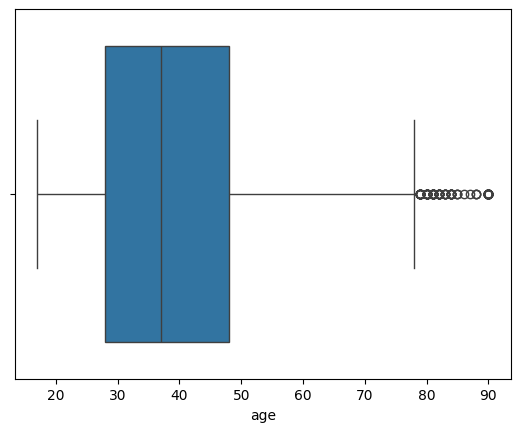

In [307]:
sns.boxplot(x=training_set["age"])
plt.show()

Even though box plot shows values above 1.5*IQR as outliers, they are not outliers
considering the attribute is "age." Since that values are within the range of human
life span, they are not outliers.

## Handling outliers in capital gain and capital loss

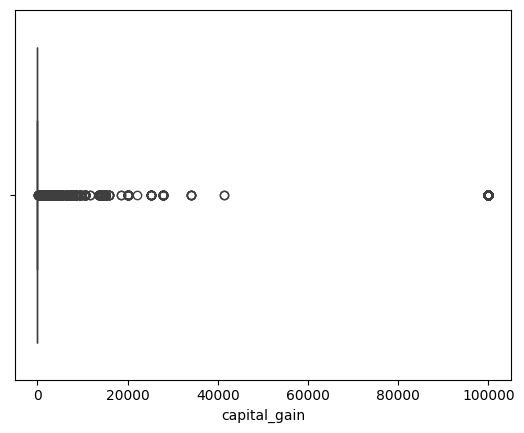

In [308]:
sns.boxplot(x=training_set["capital_gain"])
plt.show()

In [309]:
training_set[training_set["capital_gain"] > 0]["capital_gain"].describe()

count     2712.000000
mean     12938.541298
std      22395.413530
min        114.000000
25%       3411.000000
50%       7298.000000
75%      14084.000000
max      99999.000000
Name: capital_gain, dtype: float64

In [310]:
# Percentage of capital gain equal to 0

len(training_set[training_set["capital_gain"] == 0]) / training_set.shape[0]

0.9166487383594062

From the box plot, it appears as there are many outliers for capital gain.
However, more than 91% of total values of capital gain are 0. Hence, values greater
than 0 should be considered separately.

<Axes: xlabel='capital_gain'>

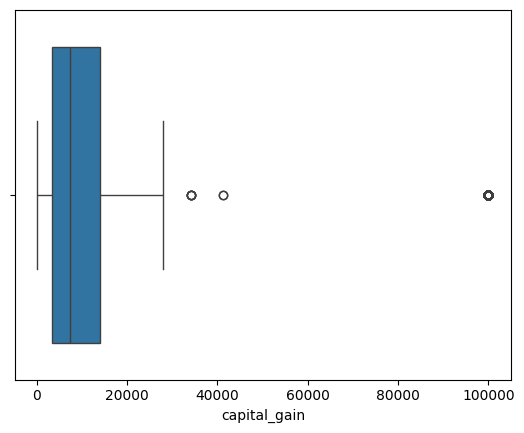

In [311]:
sns.boxplot(x=training_set[training_set["capital_gain"] > 0]["capital_gain"])

In [312]:
df_tmp = training_set[training_set["capital_gain"] > 0]

Q1 = df_tmp["capital_gain"].quantile(0.25)
Q3 = df_tmp["capital_gain"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(len(df_tmp[(df_tmp["capital_gain"] < lower_bound) | (df_tmp["capital_gain"] > upper_bound)]))
training_set = training_set[(training_set["capital_gain"] == 0) | ((training_set["capital_gain"] >= lower_bound) & (training_set["capital_gain"] <= upper_bound))]
testing_set = testing_set[(testing_set["capital_gain"] == 0) | ((testing_set["capital_gain"] >= lower_bound) & (testing_set["capital_gain"] <= upper_bound))]

166


Similarly, more than 92% of total values of capital loss are 0. Capital loss should
be treated in the same way as capital gain.

In [313]:
# Percentage of capital gain equal to 0

len(training_set[training_set["capital_gain"] == 0]) / training_set.shape[0]

0.9213493559049767

<Axes: xlabel='capital_loss'>

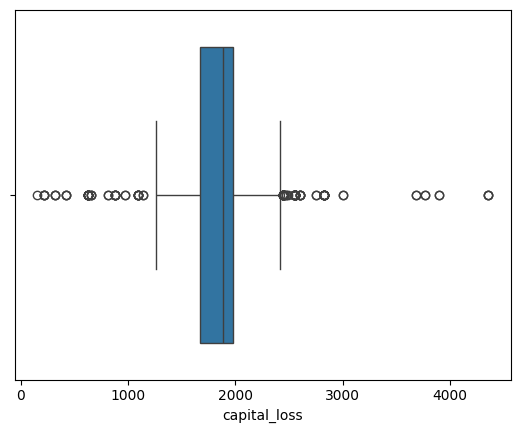

In [314]:
sns.boxplot(x=training_set[training_set["capital_loss"] > 0]["capital_loss"])

In [315]:
df_tmp = training_set[training_set["capital_loss"] > 0]

Q1 = df_tmp["capital_loss"].quantile(0.25)
Q3 = df_tmp["capital_loss"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(len(df_tmp[(df_tmp["capital_loss"] < lower_bound) | (df_tmp["capital_loss"] > upper_bound)]))
training_set = training_set[(training_set["capital_loss"] == 0) | ((training_set["capital_loss"] >= lower_bound) & (training_set["capital_loss"] <= upper_bound))]
testing_set = testing_set[(testing_set["capital_loss"] == 0) | ((testing_set["capital_loss"] >= lower_bound) & (testing_set["capital_loss"] <= upper_bound))]

107


## Handling outliers in hours_per_week

In [316]:
training_set["hours_per_week"].describe()

count    32264.000000
mean        40.390466
std         12.326305
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

<Axes: xlabel='hours_per_week'>

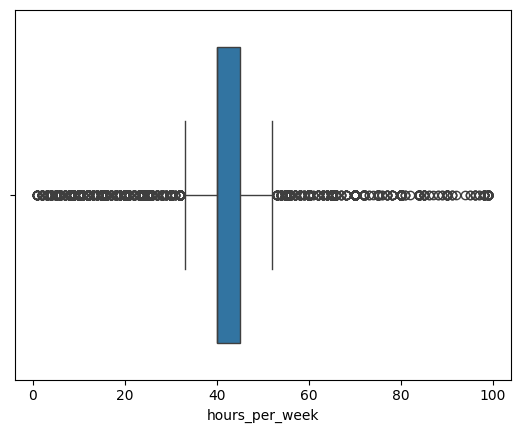

In [317]:
sns.boxplot(x=training_set["hours_per_week"])

Even though box plot shows there exist outliers for hours per week, considering
the size of dataset, there exist a considerable amount of hours per week values
outside the IQR. Hence, they are not outliers.

In [318]:
training_set_gender_grouped = training_set.groupby(["sex", "income"]).size().unstack()
training_set_race_grouped = training_set.groupby(["race", "income"]).size().unstack()
training_set_country_grouped = training_set.groupby(["native_country", "income"]).size().unstack()

# Encoding categorical values

In [319]:
training_set["sex"] = training_set["sex"].map({"Male": 1, "Female": 0})
testing_set["sex"] = testing_set["sex"].map({"Male": 1, "Female": 0})

In [320]:
temporary_df = training_set[["education", "education_num"]].drop_duplicates().sort_values(by="education_num")
print(temporary_df)
del temporary_df

        education  education_num
224     Preschool              1
160       1st-4th              2
56        5th-6th              3
15        7th-8th              4
6             9th              5
77           10th              6
3            11th              7
415          12th              8
2         HS-grad              9
10   Some-college             10
14      Assoc-voc             11
13     Assoc-acdm             12
0       Bachelors             13
5         Masters             14
52    Prof-school             15
20      Doctorate             16


This shows that the education_num is an ordinally encoded version of education. Therefore,
education can be dropped and education_num can be used instead. Since already ordinal,
can be used to test correlation with income.

In [321]:
training_set.drop("education", axis=1, inplace=True)
testing_set.drop("education", axis=1, inplace=True)

Occupation and workclass can be one-hot encoded. However, sinces explored earlier and 
identified, when both occupation and workclass are missing, it can be considered as one
category. 

In [322]:
training_set["is_profession_known"] = ~((training_set["workclass"] == "?") & (training_set["occupation"] == "?"))
testing_set["is_profession_known"] = ~((testing_set["workclass"] == "?") & (testing_set["occupation"] == "?"))

feature_encoded = pd.get_dummies(training_set["workclass"], prefix="workclass").drop("workclass_?", axis=1)
training_encoded = pd.concat([training_set, feature_encoded], axis=1).drop("workclass", axis=1)

feature_encoded = pd.get_dummies(training_set["occupation"], prefix="occupation").drop("occupation_?", axis=1)
training_encoded = pd.concat([training_encoded, feature_encoded], axis=1).drop("occupation", axis=1)

# Testing set

feature_encoded = pd.get_dummies(testing_set["workclass"], prefix="workclass").drop("workclass_?", axis=1)
testing_encoded = pd.concat([testing_set, feature_encoded], axis=1).drop("workclass", axis=1)

feature_encoded = pd.get_dummies(testing_set["occupation"], prefix="occupation").drop("occupation_?", axis=1)
testing_encoded = pd.concat([testing_encoded, feature_encoded], axis=1).drop("occupation", axis=1)

The marital statuses does not show a mathematical relationship with income. Therefore, one hot encoding shoult be used.

In [323]:
feature_encoded = pd.get_dummies(training_set["marital_status"], prefix="marital_status")
training_encoded = pd.concat([training_encoded, feature_encoded], axis=1).drop("marital_status", axis=1)

# Testing

feature_encoded = pd.get_dummies(testing_set["marital_status"], prefix="marital_status")
testing_encoded = pd.concat([testing_encoded, feature_encoded], axis=1).drop("marital_status", axis=1)

Relationship status also does not show a mathematical relationship with income.
Therefore, one hot encoding should be used.

In [324]:
feature_encoded = pd.get_dummies(training_set["relationship"], prefix="relationship")
training_encoded = pd.concat([training_encoded, feature_encoded], axis=1).drop("relationship", axis=1)

# Testing

feature_encoded = pd.get_dummies(testing_set["relationship"], prefix="relationship")
testing_encoded = pd.concat([testing_encoded, feature_encoded], axis=1).drop("relationship", axis=1)

Race and native country too needs to be encoded using one hot encoding.

In [325]:
feature_encoded = pd.get_dummies(training_set["race"], prefix="race")
training_encoded = pd.concat([training_encoded, feature_encoded], axis=1).drop("race", axis=1)
feature_encoded = pd.get_dummies(training_set["native_country"], prefix="native_country")
training_encoded = pd.concat([training_encoded, feature_encoded], axis=1).drop("native_country", axis=1)

# Testing

feature_encoded = pd.get_dummies(testing_set["race"], prefix="race")
testing_encoded = pd.concat([testing_encoded, feature_encoded], axis=1).drop("race", axis=1)
feature_encoded = pd.get_dummies(testing_set["native_country"], prefix="native_country")
testing_encoded = pd.concat([testing_encoded, feature_encoded], axis=1).drop("native_country", axis=1)

Income, which will be the target variable, should be using binary encoding.

In [326]:
training_encoded["income"] = training_encoded["income"].map({">50K": 1, "<=50K": 0})
testing_encoded["income"] = testing_encoded["income"].map({">50K": 1, "<=50K": 0})

# Identify correlation between features

<Axes: >

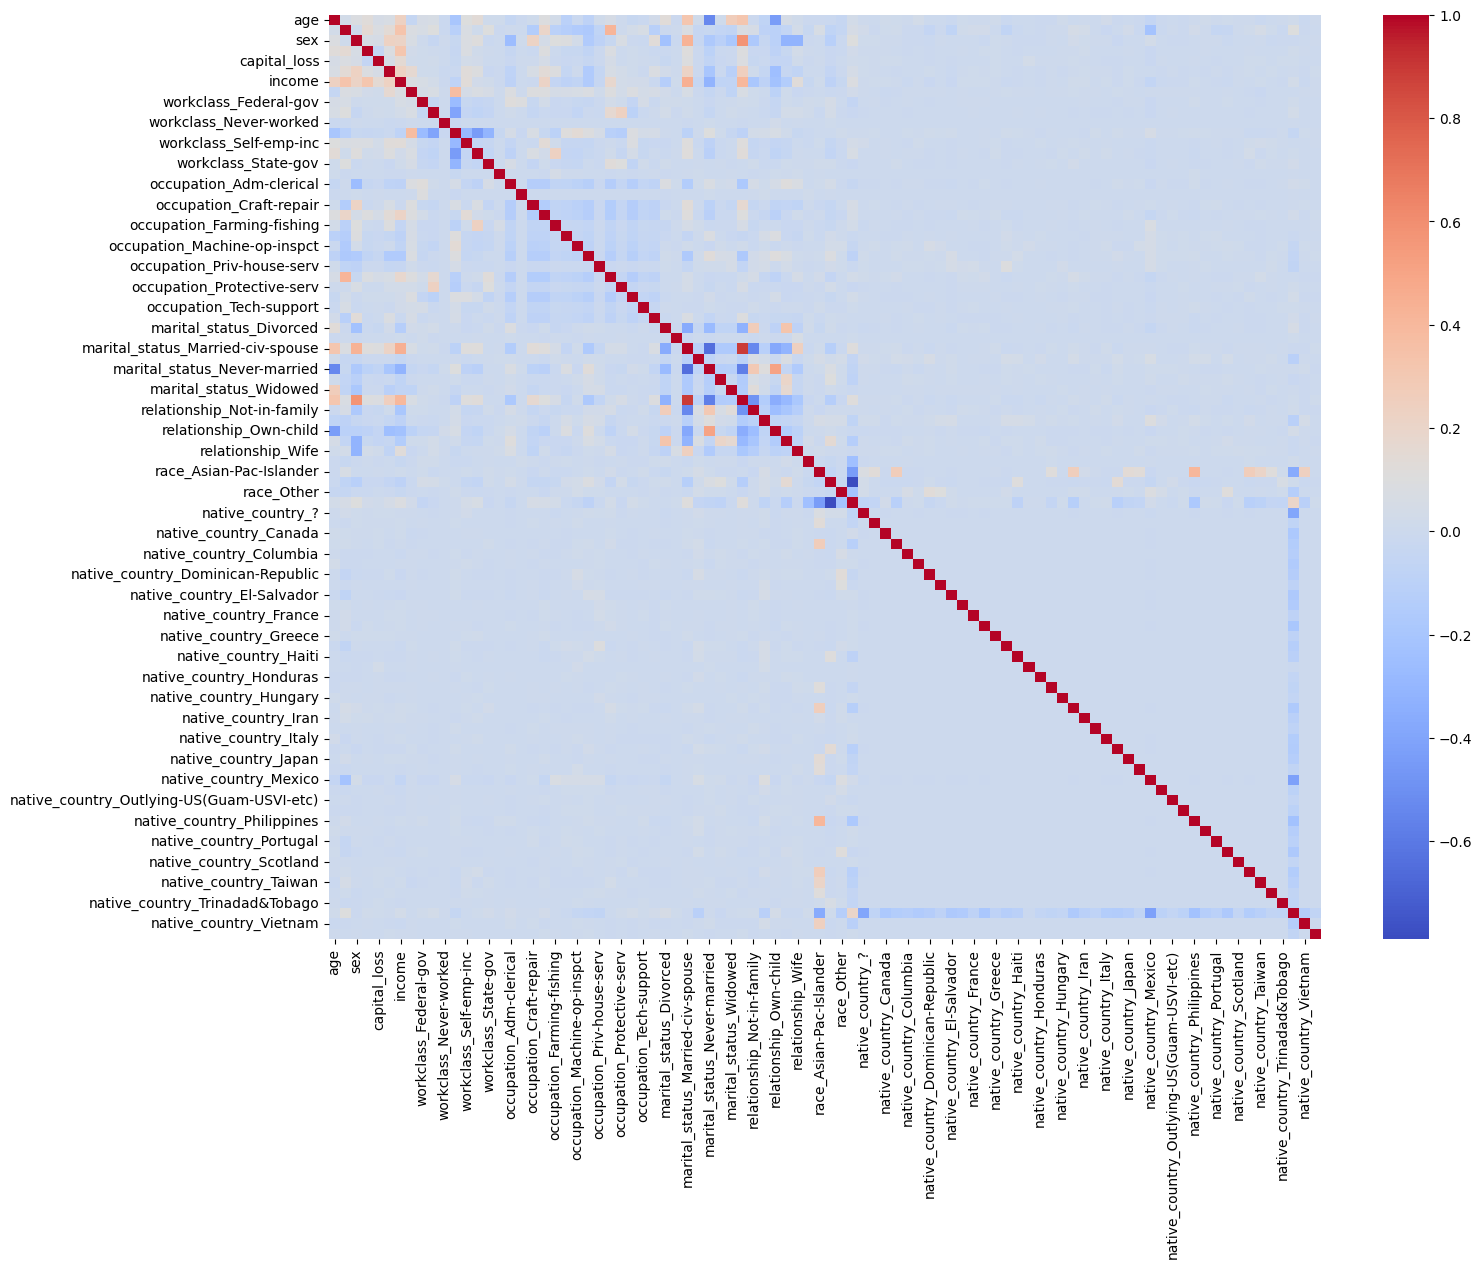

In [327]:
plt.figure(figsize=(16,12))
sns.heatmap(training_encoded.corr(), annot=False, cmap="coolwarm")

From above heatmap, it's visible that many features have low correlation with income. Therefore, narrowing down the scope will give a better idea.

In [328]:
correlations = training_encoded.corr()["income"].abs()
correlations = correlations.sort_values(ascending=False)

In [329]:
correlations[:20]

income                               1.000000
marital_status_Married-civ-spouse    0.446261
relationship_Husband                 0.401957
education_num                        0.329468
capital_gain                         0.320349
marital_status_Never-married         0.318746
age                                  0.231960
relationship_Own-child               0.226996
hours_per_week                       0.224821
sex                                  0.214690
occupation_Exec-managerial           0.213816
relationship_Not-in-family           0.191152
occupation_Prof-specialty            0.180946
occupation_Other-service             0.155368
capital_loss                         0.150022
relationship_Unmarried               0.142584
workclass_Self-emp-inc               0.133195
marital_status_Divorced              0.127921
relationship_Wife                    0.124483
race_Black                           0.088486
Name: income, dtype: float64

It is observed that from all 90 features, only less than 20 features show a correlation greater than 0.1 with income.

In [330]:
columns_to_drop = correlations.iloc[20:].index
training_encoded_short = training_encoded.drop(columns_to_drop, axis=1)

In [331]:
training_encoded_short.head()

,age,education_num,sex,capital_gain,capital_loss,hours_per_week,income,workclass_Self-emp-inc,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,marital_status_Divorced,marital_status_Married-civ-spouse,marital_status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Black
0,39,13,1,2174,0,40,0,False,False,False,False,False,False,True,False,True,False,False,False,False
1,50,13,1,0,0,13,0,False,True,False,False,False,True,False,True,False,False,False,False,False
2,38,9,1,0,0,40,0,False,False,False,False,True,False,False,False,True,False,False,False,False
3,53,7,1,0,0,40,0,False,False,False,False,False,True,False,True,False,False,False,False,True
4,28,13,0,0,0,40,0,False,False,False,True,False,True,False,False,False,False,False,True,True


<Axes: >

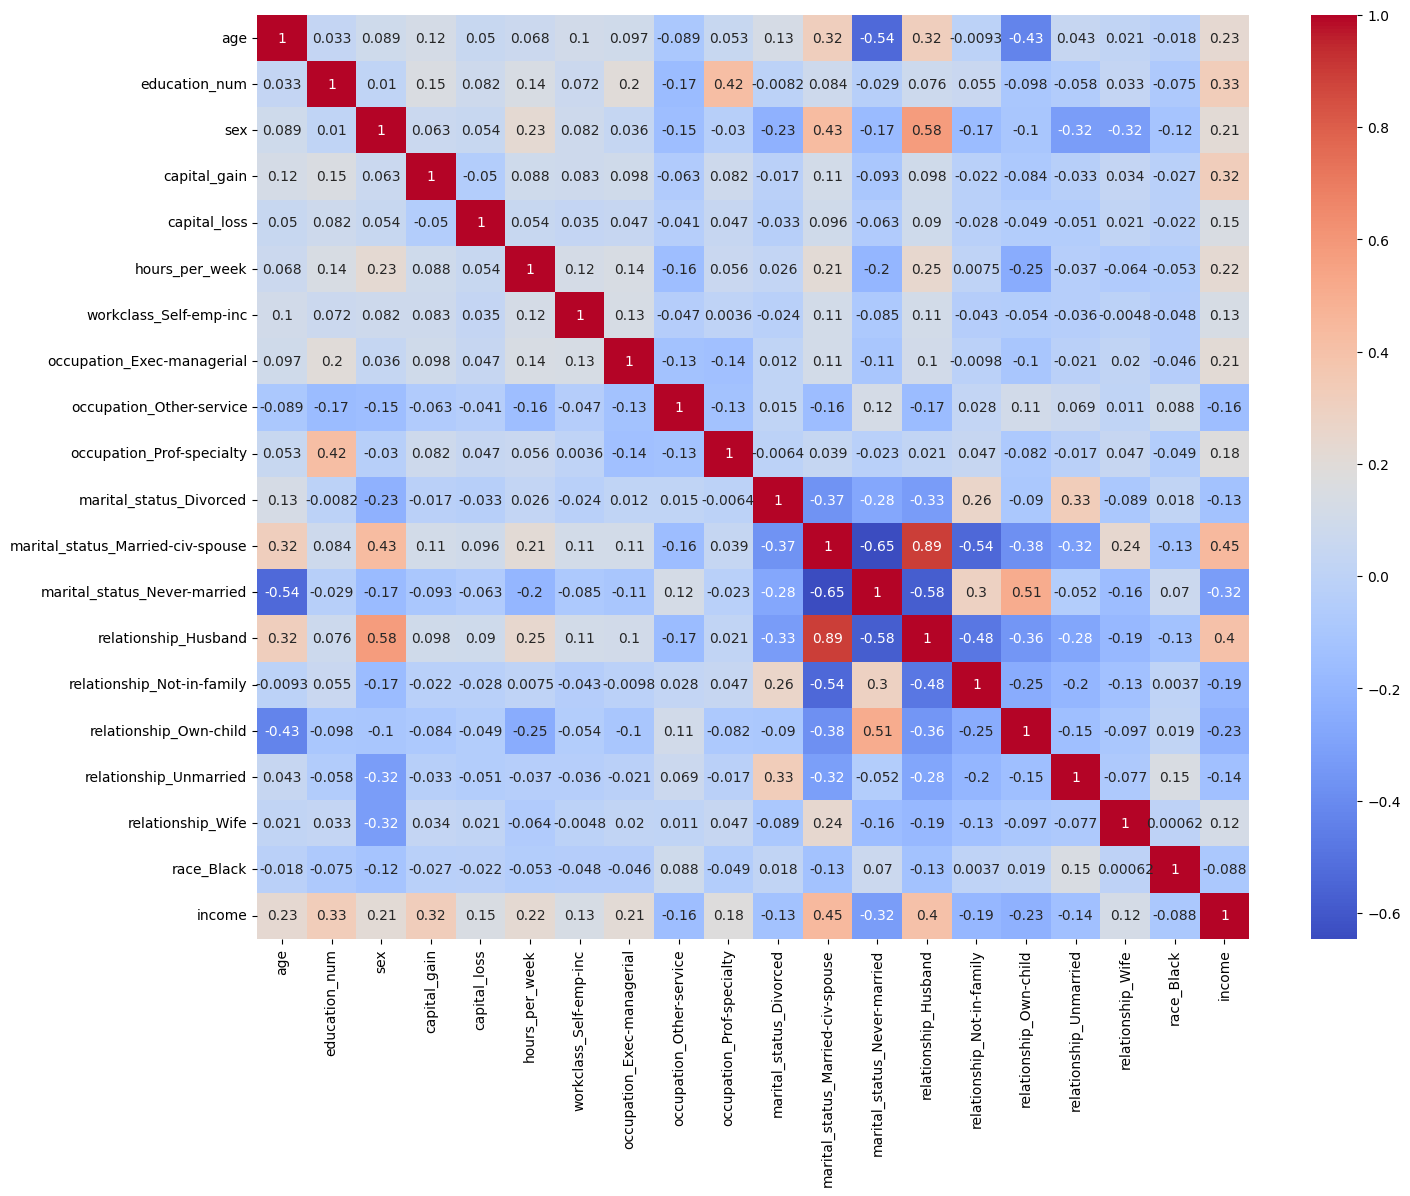

In [332]:
income_tmp = training_encoded_short["income"]
training_encoded_short.drop("income", axis=1, inplace=True)
training_encoded_short["income"] = income_tmp
del income_tmp

plt.figure(figsize=(16,12))
sns.heatmap(training_encoded_short.corr(), annot=True, cmap="coolwarm")

# Model training

In [333]:
print(testing_encoded.shape)
print(training_encoded.shape)

(16146, 89)
(32264, 90)


In [334]:
print(sorted(training_encoded.columns))
print(sorted(testing_encoded.columns))

['age', 'capital_gain', 'capital_loss', 'education_num', 'hours_per_week', 'income', 'is_profession_known', 'marital_status_Divorced', 'marital_status_Married-AF-spouse', 'marital_status_Married-civ-spouse', 'marital_status_Married-spouse-absent', 'marital_status_Never-married', 'marital_status_Separated', 'marital_status_Widowed', 'native_country_?', 'native_country_Cambodia', 'native_country_Canada', 'native_country_China', 'native_country_Columbia', 'native_country_Cuba', 'native_country_Dominican-Republic', 'native_country_Ecuador', 'native_country_El-Salvador', 'native_country_England', 'native_country_France', 'native_country_Germany', 'native_country_Greece', 'native_country_Guatemala', 'native_country_Haiti', 'native_country_Holand-Netherlands', 'native_country_Honduras', 'native_country_Hong', 'native_country_Hungary', 'native_country_India', 'native_country_Iran', 'native_country_Ireland', 'native_country_Italy', 'native_country_Jamaica', 'native_country_Japan', 'native_count

In [335]:
print(correlations["native_country_Holand-Netherlands"])
print(correlations.index.get_loc("native_country_Holand-Netherlands"))

0.003100030832785543
85


It is observed that the native-country "Holand-Netherlands" does not exist in testing dataset. This could be a problem when trying to evaluate the trained models since the shape of dataframes will be different.

However, considering the correlation score of 0.0003, it is safe to drop the column. Also,
after sorting the correlation values, this value is in position 83, which is not significant for the prediction.

In [336]:
training_encoded.drop("native_country_Holand-Netherlands", axis=1, inplace=True)

In [337]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

training_x = training_encoded.drop("income", axis=1)
training_y = training_encoded["income"]

testing_x = testing_encoded.drop("income", axis=1)
testing_y = testing_encoded["income"]

Using GridSearchCV, the best model can be found in a given hyperparameter space.
However, it is computationally expensive.

In [338]:
hyperparameters = {
    "n_estimators" : [100, 300, 500],
    "max_depth" : [None, 10, 50],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=hyperparameters, verbose=10)
# grid_search.fit(training_x, training_y)

In [339]:
# grid_search_results = pd.DataFrame(grid_search.cv_results_)
# grid_search_results.sort_values(by="rank_test_score", inplace=True)
# grid_search_results.to_csv("grid_search_results.csv")
# grid_search.best_params_

In [340]:
rfc = RandomForestClassifier(n_estimators=300, max_depth=10)
rfc.fit(training_x, training_y)
rfc.score(testing_x, testing_y)

0.8615756224451877

In [341]:
gnb = GaussianNB()
gnb.fit(training_x, training_y)
gnb.score(testing_x, testing_y)

0.7713984887897931

# Model evaluation

In [342]:
# Classification report for Random forest classifier

from sklearn.metrics import classification_report

print("Classification report for Random Forest Classifier")
print(classification_report(testing_y, rfc.predict(testing_x)))
print()

print("Classification report for Gaussian Naive Bayes")
print(classification_report(testing_y, gnb.predict(testing_x)))
print()

Classification report for Random Forest Classifier


              precision    recall  f1-score   support

           0       0.87      0.96      0.91     12409
           1       0.80      0.53      0.64      3737

    accuracy                           0.86     16146
   macro avg       0.84      0.75      0.78     16146
weighted avg       0.86      0.86      0.85     16146


Classification report for Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.94      0.75      0.83     12409
           1       0.50      0.85      0.63      3737

    accuracy                           0.77     16146
   macro avg       0.72      0.80      0.73     16146
weighted avg       0.84      0.77      0.79     16146




<Axes: >

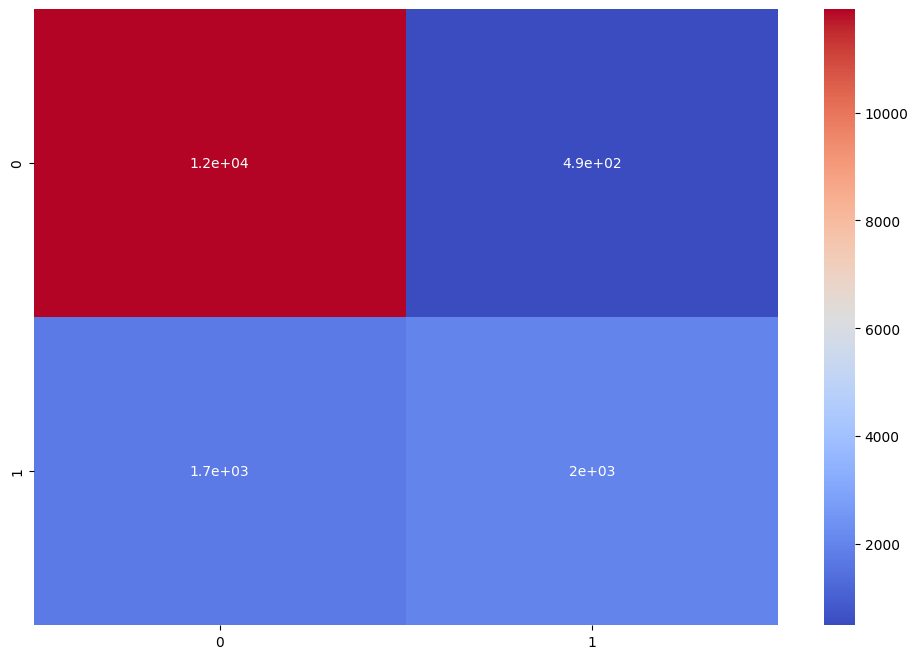

In [343]:
# Confusion matrix with seaborn

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(testing_y, rfc.predict(testing_x))

plt.figure(figsize=(12,8))
sns.heatmap(conf_matrix, annot=True, cmap="coolwarm")